<a href="https://colab.research.google.com/github/sawpnil0310/Election-result-prediction/blob/main/ML_MINI_PROJECT2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

def train_models_and_predict(file_path):
    # Read the CSV file into a Pandas DataFrame
    df = pd.read_csv(file_path)

    # One-hot encode categorical variables
    df = pd.get_dummies(df)

    # Prepare the data
    if 'Party' in df.columns:
        X = df.drop(columns=['Party'])  # Features
        y = df['Party']  # Target variable

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train Random Forest Classifier
        rf_clf = RandomForestClassifier()
        rf_clf.fit(X_train, y_train)

        # Train Logistic Regression Classifier
        lr_clf = LogisticRegression()
        lr_clf.fit(X_train, y_train)

        # Train Linear Regression model
        model = LinearRegression()
        model.fit(X_train, y_train)  # This line was missing

        # Predictions on test data
        rf_pred_test = rf_clf.predict(X_test)
        lr_pred_test = lr_clf.predict(X_test)
        lr_accuracy_test = accuracy_score(y_test, lr_pred_test)

        # Make predictions using Linear Regression model
        y_pred = model.predict(X_test)

        # Calculate accuracy of Linear Regression model (if applicable)
        linear_regression_accuracy = None
        if isinstance(y_pred[0], (int, float)):
            linear_regression_accuracy = model.score(X_test, y_test)

        # Calculate accuracy on test data for Random Forest and Logistic Regression
        rf_accuracy_test = accuracy_score(y_test, rf_pred_test)

    else:
        # No target variable, cannot train models
        rf_accuracy_test, lr_accuracy_test, linear_regression_accuracy = None, None, None

    return rf_accuracy_test, lr_accuracy_test, linear_regression_accuracy

# Rest of the code remains unchanged



def find_dominant_party(file_path):
    df = pd.read_csv(file_path)
    party_votes = df.groupby('Party')['Total Electors'].sum()
    dominant_party = party_votes.idxmax()
    max_votes = party_votes.max()
    return dominant_party, max_votes

def calculate_vote_contribution(file_path):
    df = pd.read_csv(file_path)
    party_votes = df.groupby('Party')['Total Electors'].sum()
    total_electors = df['Total Electors'].sum()
    party_votes_percentage = (party_votes / total_electors) * 100
    return party_votes, party_votes_percentage

# Path to the CSV file
file_path = "/content/drive/MyDrive/ML MINI PROJECT 2024/ELECTION 2019 RESULT.csv"

# Find the dominant party
dominant_party, max_votes = find_dominant_party(file_path)
print("Dominant Party:", dominant_party)
print("Total Electors Polled:", max_votes)

# Train models and predict on test data
rf_accuracy_test, lr_accuracy_test, linear_regression_accuracy = train_models_and_predict(file_path)

# Calculate vote contribution and percentage of votes contributed by each party
party_votes, party_votes_percentage = calculate_vote_contribution(file_path)

# Print the winner party name with vote contribution and percentage of votes contributed
print("\nParty-wise Vote Contribution and Percentage of Votes Contributed:")
for party in party_votes.index:
    print(f"{party}: Vote Contribution - {party_votes[party]}, Percentage of Votes - {party_votes_percentage[party]:.2f}%")


Dominant Party: BJP
Total Electors Polled: 526953155

Party-wise Vote Contribution and Percentage of Votes Contributed:
AAP: Vote Contribution - 1529432, Percentage of Votes - 0.17%
ADMK: Vote Contribution - 1554051, Percentage of Votes - 0.17%
ADS: Vote Contribution - 3516468, Percentage of Votes - 0.39%
AIMIM: Vote Contribution - 3842638, Percentage of Votes - 0.42%
AITC: Vote Contribution - 36881955, Percentage of Votes - 4.07%
AIUDF: Vote Contribution - 1856168, Percentage of Votes - 0.20%
AJSU Party: Vote Contribution - 1647715, Percentage of Votes - 0.18%
BJD: Vote Contribution - 18359865, Percentage of Votes - 2.03%
BJP: Vote Contribution - 526953155, Percentage of Votes - 58.19%
BSP: Vote Contribution - 17559288, Percentage of Votes - 1.94%
CPI: Vote Contribution - 2832896, Percentage of Votes - 0.31%
CPM: Vote Contribution - 4848115, Percentage of Votes - 0.54%
DMK: Vote Contribution - 35184257, Percentage of Votes - 3.89%
INC: Vote Contribution - 77490399, Percentage of Votes

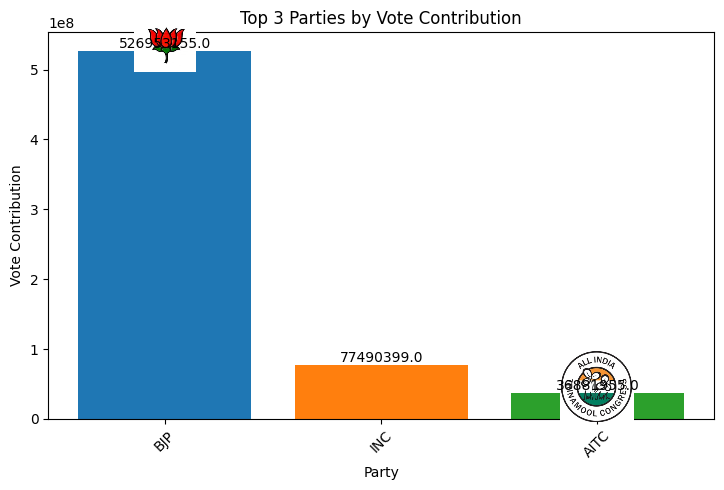

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def plot_rank_chart_with_logos(df, logos):
    # Sort DataFrame by 'Vote Contribution' in descending order
    df_sorted = df.sort_values(by='Vote Contribution', ascending=False).head(3)  # Display top 3 parties

    # Define colors for the bars
    colors = plt.cm.tab10.colors

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(8, 5))

    # Plot bars
    for i, (party, row) in enumerate(df_sorted.iterrows()):
        ax.bar(party, row['Vote Contribution'], color=colors[i])

        # Add party logo
        logo_path = logos.get(party)  # Get logo path for the party
        if logo_path:
            image = plt.imread(logo_path)
            imagebox = OffsetImage(image, zoom=0.2)
            ab = AnnotationBbox(imagebox, (i, row['Vote Contribution']), frameon=False, xybox=(0, 5), xycoords='data', boxcoords="offset points")
            ax.add_artist(ab)

        # Add text label for vote contribution
        ax.text(i, row['Vote Contribution'] + 10, f"{row['Vote Contribution']}", ha='center', va='bottom')

    # Set labels and title
    ax.set_xlabel('Party')
    ax.set_ylabel('Vote Contribution')
    ax.set_title('Top 3 Parties by Vote Contribution')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage
# Load data from CSV
file_path = "/content/drive/MyDrive/ML MINI PROJECT 2024/ELECTION 2019 RESULT.csv"
df = pd.read_csv(file_path)

# Calculate vote contribution for each party
party_votes = df.groupby('Party')['Total Electors'].sum()
party_votes_percentage = (party_votes / party_votes.sum()) * 100
df_vote_contribution = pd.DataFrame({'Vote Contribution': party_votes, 'Percentage of Votes': party_votes_percentage})

# Define logos for the top 3 parties
logos = {
    "BJP": "/content/drive/MyDrive/ML MINI PROJECT 2024/BJP.jpg",
    "CONGRESS": "/content/drive/MyDrive/ML MINI PROJECT 2024/CONGRESS1.jpg",
    "AITC": "/content/drive/MyDrive/ML MINI PROJECT 2024/AITC.jpg"
}

# Plot the rank chart with logos
plot_rank_chart_with_logos(df_vote_contribution, logos)


In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Read the dataset
file_path = "/content/drive/MyDrive/ML MINI PROJECT 2024/ELECTION 2019 RESULT.csv"
df = pd.read_csv(file_path)

# Drop non-numeric and unnecessary columns
df = df.drop(['Constituency Name', 'Candidate Name'], axis=1)

# Define features and target
X = df.drop(['Party'], axis=1)  # Features
y = df['Party']  # Target

# One-hot encode categorical variables
categorical_cols = ['State Name', 'Sex', 'Constituency Type']
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create and train the model
model = GradientBoostingClassifier()  # Initialize the model
model.fit(X_train, y_train)  # Train the model

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the dominant party based on seat counts
dominant_party = df['Party'].value_counts().idxmax()

# Output the predicted dominant party
print("Dominant Party (Predicted):", dominant_party)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)

# Additional analysis
party_counts = df['Party'].value_counts()
print("\nNumber of Seats Won by Each Party:")
print(party_counts)

party_percentages = party_counts / party_counts.sum() * 100
print("\nPercentage Share of Each Party in Votes:")
print(party_percentages)


Dominant Party (Predicted): BJP
Model Accuracy: 0.5963302752293578

Number of Seats Won by Each Party:
Party
BJP           303
INC            52
DMK            23
YSRCP          22
AITC           22
SHS            18
JD(U)          16
BJD            12
BSP            10
TRS             9
LJP             6
SP              5
NCP             5
IND             4
JKN             3
IUML            3
CPM             3
TDP             3
ADS             2
CPI             2
SAD             2
AIMIM           2
NPP             2
NDPP            1
AAP             1
RLP             1
SKM             1
AIUDF           1
RSP             1
VCK             1
ADMK            1
KEC(M)          1
JD(S)           1
AJSU Party      1
JMM             1
MNF             1
Name: count, dtype: int64

Percentage Share of Each Party in Votes:
Party
BJP           55.904059
INC            9.594096
DMK            4.243542
YSRCP          4.059041
AITC           4.059041
SHS            3.321033
JD(U)          2.952030
B